# Stærðfræði og reiknifræði – Skilaverkefni 4
Leysið verkefnin með því að færa lausnir hér inn í þessa Júpíter-bók, búa til úr henni PDF-skjal (*File–Print–PDF* í vafra kemur best út)) og hlaða því inn í Gradescope. Í Gradescope þarf að tilgreina á hvaða blaðsíðu lausn hvers dæmis er. Skilafrestur er á þriðjudag 12. feb. kl. 17:00.

Þið megið hjálpast að, en hver fyrir sig verður að skila sinni lausn. Ef þið vinnið náið saman þá þarf að geta vinnufélaga í svari við "Hvernig gekk spurningu aftast" (ekki sleppa henni). Það er bannað að fá lánaðar tilbúnar lausnir eða lána öðrum.

In [2]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np, numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as st, scipy.optimize as opt
plt.rc('axes', axisbelow=True)
%matplotlib inline
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

def plotline(a,b):
    """Teiknar línu y = ax + b inn á mynd sem er virk"""
    X = np.array(plt.xlim())
    Y = a*X + b
    plt.plot(X,Y,lw=3)
    
def plotpara(a,b,c):
    """Teiknar parabólu y = ax^2 + bx + c inn á mynd sem er virk"""
    x = np.linspace(*plt.xlim())
    y = a*x**2 + b*x + c
    plt.plot(x,y,lw=3)

## S4.1 Lágmörkun
Í fyrirlestraræfingu 4 var fall Rosenbrocks, 

$$
f(x_0, x_1) = (1 - x_0)^2 + 100(x_1 - x_0^2)^2
$$

útfært í Python og í framhaldi lágmarkað með `scipy.optimize.minimize`. Hér er kafli úr lausnin:

In [3]:
def ros(x):
    a = (1 - x[0])**2
    b = (x[1] - x[0]**2)
    return a + 100*b**2

x0 = np.array([-1.2,1])
result = opt.minimize(ros,x0)
print(result)

      fun: 4.416713793055336e-11
 hess_inv: array([[0.50, 0.99],
       [0.99, 1.98]])
      jac: array([-0.00, -0.00])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 31
     njev: 38
   status: 0
  success: True
        x: array([1.00, 1.00])


Teikning hæðarlína hefur líka verið á dagskrá bæði í Tímadæmum 4 og Fyrirlestraræfingu 5. 

***Verkefnið:***

1. Teiknið hæðarlínur fallsins `ros` á rétthyrningnum $[-1.5, 1.5] \times [-0.5, 2.5]$.
   Til að fá    sæmilega mynd þarf nota svolítið marga punkta í `np.linspace` (t.d. 120)
   og auk þess að láta `plt.contour` fá handvalinn `level`-stika. Þessi dugar t.d.:

          L = np.linspace(0,26,14)**2
          L[0] = 0.2

2. Teiknið svo lággildispunktinn $(1,1)$ inn á myndina, grænan og sæmilega stóran.

3. `opt.minimize` getur tekið inn viðbótarstika `callback=cb`, og þá kallar það á
   `cb(xk)` með núverandi ítrekunargildi `xk` í hverri ítrekun (í þessu tilviki
   er `xk` tveggja staka vigur). Lágmarkið `ros` og notið þennan "fídus" til að 
   teikna ítrekunargildin (t.d. með `plt.scatter(x[0],x[1])` inni í `cb`).

4. `opt.minimize` getur líka tekið inn stika `method="aðferð"`, þar sem
   aðferð getur t.d. verið 'L-BFGS-B', 'CG', og 'Powell' fyrir utan þá
   sjálfvöldu, 'BFGS'. Prófið og segið frá niðurstöðum (ath. að auk 
   `result.nit` þarf að skoða `result.nfev` sem gefur fjölda kalla á `ros`).

(1.5, 2.5)


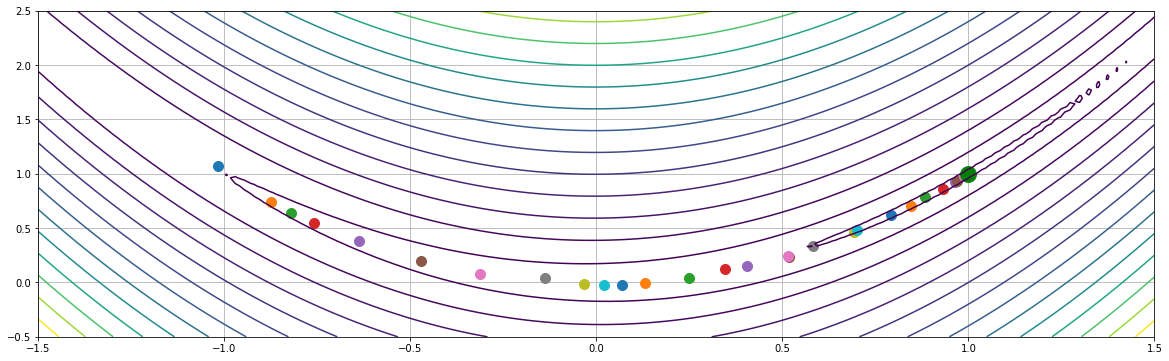

In [4]:
# 1
L = np.linspace(0,26,14)**2
L[0] = 0.2
x = np.linspace(-1.5,1.5,120)
y = np.linspace(-0.5,2.5,120)
nx = len(x)
ny = len(y)
z = np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        d = (x[i],y[j])
        z[i,j] = ros(d)
print(d)
def cb(q):
    plt.scatter(q[0],q[1],s=100)
# 3
plt.figure(figsize=(20,6))
result = opt.minimize(ros,x0,callback=cb)
# 2
plt.scatter(1,1,s=250,c='g')
plt.contour(x,y,z.T,L)
plt.grid()

## S4.2 Hiti og úrkoma
***Innlestur gagna:***
Náið í skrána ``hitiúrkoma.txt`` á Piazza. Skráin geymir ársmeðalhita og heildarúrkomu áranna 1949–2018 í Stykkishólmi og byrjar svona:

        1949	3.2	565.5
        1950	4.0	535.5
        1951	3.4	460.6
        ...

Með hliðsjón af liðum 5 & 6 í skiladæmi S3.1 má lesa gögnin inn í Python með:

        (ár,hiti,úrk) = np.loadtxt('hitiúrkoma.txt').T
        
***Skatterplott með litakóða:***
Í [fyrirlestrarnótum](https://notendur.hi.is/~jonasson/strei/kafli02.html#teikning-me-matplotlib )
er fjallað um *skatterplott*-skipunina sem kalla má á með:

        plt.scatter(x, y, c=litur, s=stærð, edgecolor=randlitur)
        
Þar var hinsvegar ekki nefnt að `c` má vera vigur (og raunar `s` líka), og svo má kalla á
`plt.colorbar()` til að sjá til hvaða talnagilda litirnir svara. Hér er dæmi sem notar alla stikana:

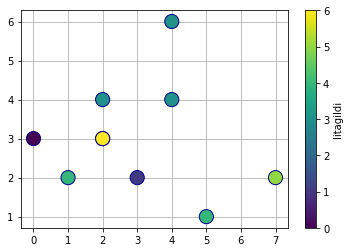

In [5]:
x = np.array([5,7,2,3,0,2,4,1,2,4])
y = np.array([1,2,3,2,3,4,6,2,3,4])
z = np.array([4,5,2,1,0,3,3,4,6,3])
plt.scatter(x, y, c=z, s=200, edgecolor='darkblue')
plt.colorbar(label='litagildi'); plt.grid()

(svo er hægt að skipta litaskalanum (*colormap*) út, en bíðum með að tala um það). 

***Myndir hlið við hlið:*** Annað trix sem ekki hefur verið rætt er að teikna tvö (eða fleiri) línurit hlið við hlið í samsettri mynd. Þá er notað `plt.subplot(1,n,i)` sem velur `i`-ta línuritið af `n` (byrjar að telja í 1 á ópæþónskan máta). Hér er einfalt dæmi:

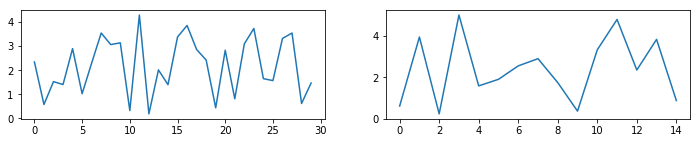

In [7]:
plt.figure(figsize = (12,2))
plt.subplot(1,2,1); plt.plot(5*npr.random(30))

plt.subplot(1,2,2); plt.plot(5*npr.random(15));

***Um fylgni:*** Í byrjunarreitnum er aðaltölfræðipakkinn fyrir Python fluttur inn með `import scipy.stats as st`.
   Eitt af því sem hann ræður við er að reikna fylgnistuðul tveggja vigra, `x` og `y`, og reyndar í 
   leiðinni p-gildi fyrir þá tilgátu að fylgnistuðullinn sé ekki 0:
   
           (r,p) = pearsonr(x, y)
           
   Ef $p = 0.05$ þá er nokkuð ólíklegt að fylgnin sé í raun engin og og það sé bara fyrir tilviljun
   að sem við fáum jákvæðan eða neikvæðan fylgnistuðul: Það mundi bara gerast í tuttugasta hvert skipti
   að við fengjum meiri fylgni úr gögnum sem eru í raun óháð. Og ef $p$ er minna, t.d. 0.01 þá er
   það orðið mjög ólíklegt. Oft er talað um að fylgni sé marktæk ef $p$ er lítið, og $p$ er
   þá kallað marktæknistig. Stundum er þess getið innan sviga: *Fylgnin er marktæk (p < 0.01)*. 
   Hæg er að lesa um fylgni 
   [hér](https://www.spss-tutorials.com/pearson-correlation-coefficient/) eða á 
   [Wikipediu](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (dálítið flókin grein)
   og líka [æft ykkur að meta fylgni](https://en.wikiversity.org/wiki/Survey_research_and_design_in_psychology/Tutorials/Correlation/Scatterplot_correlation_guess).

***Verkefnið***
1. Teiknið *skatterplott* af úrkomu (á y-ás) á móti hita í vinstri hlutmynd (*subplot*). 
   Látið ártalið stjórna lit. Setjið inn merkingar á ása, rúðunet, titil, *colorbar*.
   Veljið hæfilega punktastærð. Reiknið líka jöfnu bestu línu (sbr. kafla
   [2.3.6](https://notendur.hi.is/~jonasson/strei/kafli02.html#teikning-punktasafns-og-jafna-bestu-linu) 
   í fyrirlestrarnótum) og teiknið hana inn á myndina með fallinu `plotline` sem skilgreint er í 
   reitnum #BYRJA að ofan.
   
2. Finnið fylgni ársúrkomu og ársmeðalhita í Stykkishólmi og p-gildi hennar. Er fylgnin marktæk?
   (þið megið gjarnan búa til textareit og svara í honum).
   
3. Teiknið *skatterplott* af meðalhita á móti ári í hægri hlutmynd (*subplot*) og
   látið úrkomuna stjórna lit. Setjið inn merkingar eins og í lið 1. 
   
4. Nú er sambandið milli árs og hita ekki lengur línulegt, því það kólnaði upp úr 1960 og
   hlýnaði svo aftur eftir 1990. Reiknið bestu parabólu fyrir gögnin í hægri myndinni
   (notið `polyfit`) og teiknið hana inn með fallinu `plotpara` sem skilgreint er að ofan.
   
5. Búið til textareit og setjið inn í hann skilgreiningu á falli $P$ sem þarf að lágmarka til
   að finna jöfnu bestu parabólu, á svipaðan hátt og fallið $S$:
   
   $$\notag
   S(a,b) = \sum_{i=1}^{n}(ax_i + b - y_i)^2
   $$
   
   er lágmarkað til að finna jöfnu bestu línu.

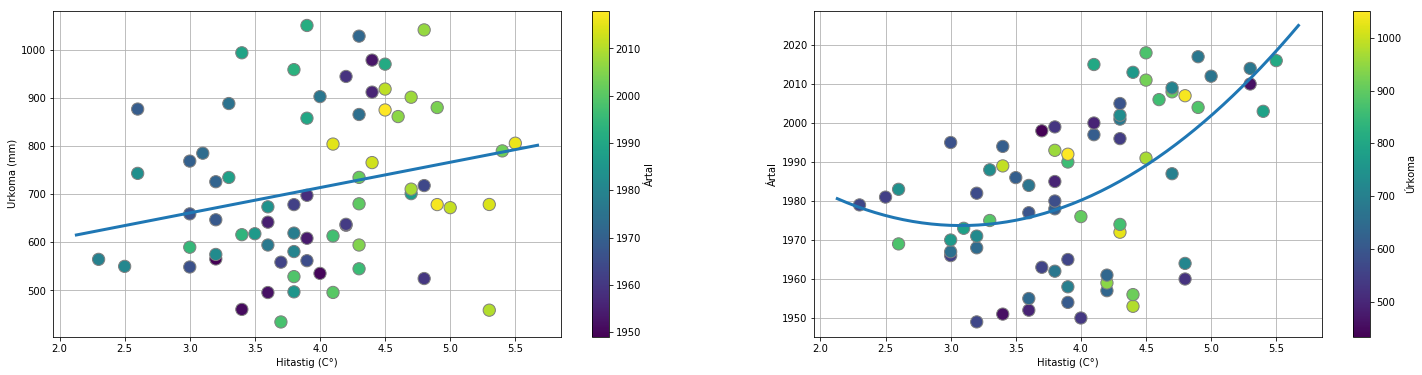

In [8]:
# 1
(ar, hiti, urk) = np.loadtxt('hitiúrkoma.txt').T
plt.figure(figsize=(25,6))
plt.title("Hiti og úrkoma: ")
plt.subplot(1,2,1)
plt.scatter(hiti,urk,c=ar,s=150,edgecolor='gray')
plt.grid()
plt.xlabel("Hitastig (C°)")
plt.ylabel("Urkoma (mm)");
plt.colorbar(label='Ártal')
# besta lina
(x,y) = np.polyfit(hiti,urk,1)
plotline(x,y)
# 3
plt.subplot(1,2,2)
plt.scatter(hiti,ar,c=urk,s=150,edgecolor='gray')
plt.xlabel("Hitastig (C°)")
plt.ylabel("Ártal")
plt.grid()
plt.colorbar(label='Úrkoma');
# bestasta línan <3
(p,q,r) = np.polyfit(hiti,ar,2)
plotpara(p,q,r)

In [9]:
# 2 
(r,p) = st.pearsonr(hiti,urk)
if (p < 0.01):
    print("Fylgnin er marktaek")
else: 
    print("Fylgnin er sennilega ekki marktaek")

Fylgnin er sennilega ekki marktaek


In [10]:
# 6
def P(x,y,z):
    (p,q,r) = np.polyfit(x,y,z)
    return p, q, r

## S4.3 Hvernig gekk?
Skrifið örfá orð aftast í þennan reit um hvernig ykkur gekk að leysa verkefnið. Var það tímafrekt? Of þungt eða of létt? Lærdómsríkt? Með hverjum var unnið? Setjið nafnið ykkar undir.


## Hvernig mér gekk
Mér fannst erfitt að skilja fyrirmæli í þessari æfingu. Það sem er beðið um er ekki nógu skýrt.

-Teitur